## Deluppgift 1
Ev. kommentar:

In [3]:
import os
import sys
import csv
import datetime
import matplotlib.pyplot as plt
import numpy as np
 
# ================================================================
# LÄSER IN EN CSV FIL OCH RETURNERAR INNEHÅLLET SOM EN 2-DIMENSIONELL LISTA
def read_file(file_name):
    
    # DEFINE VARIABLES
    outputList = []
    
    # CHECK IF FILE EXISTS
    if not os.path.isfile(file_name):
        print('File does not exist. Terminating process.')
        sys.exit()
    else:
        with open (file_name, mode='r', encoding='utf-8') as file:
            csvReader = csv.reader(file, delimiter = ';')
            
            # LOOP THROUGH CSV FILE AND APPEND EACH LINE TO OUTPUT LIST
            for line in csvReader:
                outputList.append(line)
                
            # RETURN OUTPUT LIST
            return outputList

# ================================================================
# HUVUDPROGRAM

platsdata = read_file('platsData.csv')
kameradata = read_file('kameraData.csv')

# SKRIV UT FÖRSTA TRE RADERNA I KAMERADATA
print("Kameradata-filen: ")
print(kameradata[0:3])
print()

# SKRIV UT FÖRSTA TRE RADERNA I PLATSDATA
print("Platsdata-filen: ")
print(platsdata[0:3])
print()

Kameradata-filen: 
[['MätplatsID', 'Gällande Hastighet', 'Hastighet', 'Datum', 'Tid'], ['14075010', '40', '55', '2021-09-11', '11:15:31'], ['14075010', '40', '54', '2021-09-11', '08:09:17']]

Platsdata-filen: 
[['MätplatsID', 'Namn', 'Vägnummer', 'Kommun'], ['14002010', 'Bhpl Gestadvägen', 'E45', 'Vänersborg'], ['14002020', 'Bhpl Gestadvägen', 'E45', 'Vänersborg']]



## Deluppgift 2
Ev. kommentar:

In [ ]:
# ================================================================
# FUNCTION NUMBER OF CARS
def antal_bilar(kamera_data):
    
    # DEFINE VARIABLES
    totalCars = 0
    outputList1 = []
    outputList2 = []
    
    # FIND ALL SPEED LIMITS
    for i in range(1, len(kamera_data), 1):
        currentSpeed = int(kamera_data[i][1])
        if not currentSpeed in outputList1:
            outputList1.append(currentSpeed)
            outputList1.sort()            
            outputList2.append(0)
    
    # POPULATE LIST OF CARS AT EACH SPEED LIMIT
    for j in range(1, len(kamera_data), 1):
        currentSpeed = int(kamera_data[j][1])
        index = outputList1.index(currentSpeed)
        outputList2[index] += 1
        totalCars += 1
    
    # PRINT CAR & SPEED LIMIT DATA
    for k in range(0, len(outputList1), 1):
        print("Det finns " 
              + str(outputList2[k]) 
              + "\tmätningar där gällande hastighet är " 
              + str(outputList1[k]) + "km/h")
        
    print("================================================================")
    print("Totalt passerade " + str(totalCars) + " bilar.")
    
    # PLOT DIAGRAM
    plt.rcParams.update({'font.size': 14})
    plt.bar(outputList1, outputList2)
    plt.title("Antal fordon för varje gällande hastighet")
    plt.xlabel("Gällande hastighet")
    plt.ylabel("Antal passerade fordon")
    plt.grid(True)
    plt.show()

# ================================================================
# HUVUDPROGRAM

antal_bilar(kameradata)


## Deluppgift 3
Ev. kommentar:

In [ ]:
# ================================================================
# FUNCTION NUMBER OF CAMERAS
def antal_kameror(plats_data):
    
    # DEFINE VARIABLES
    totalCameras = 0
    areaDict = {}
    
    # POPULATE DICTIONARY WITH CAMERA AND AREA DATA
    for i in range(1, len(plats_data), 1):
        currentArea = plats_data[i][3]
        if not currentArea in areaDict:
            areaDict[currentArea] = 1
            totalCameras += 1
        else:
            areaDict[currentArea] += 1
            totalCameras += 1
    
    # PRINT DICTIONARY CONTENTS
    print(f'{"Kommun":<24}{"Antal kameror":<24}')
    print("================================================")
    for key in sorted(areaDict.keys()):
        print(f'{key:<24}{str(areaDict[key]):<24}')
        
    print("================================================")
    print("Det finns totalt " + str(totalCameras) + " kameror.")
    print("================================================\n")

# ================================================================
# HUVUDPROGRAM

antal_kameror(platsdata)

## Deluppgift 4
Ev. kommentar: 

Jag har här valt att lägga in default parameters till funktionen hastighetplus(), i form av "procentover = -1.0" och "displayData = True". Anledningen till detta är att man skall kunna anropa funktionen med en redan angiven procentsats hastighetsöverträdelse och därmed hoppa över steget som tar input från konsolen/användaren, samt kunna anropa funktionen utan att data skrivs ut, alltså ENDAST för att få ut listan den returnerar.


Det var 12 överträdelser som var mer än 90% över gällande hastighet.

Tid             Mätplats ID     Gällande Hastighet      Hastighet       Datum           
07:45:29        14039010        70 km/h                 135 km/h        2021-09-11      
12:06:26        14007040        80 km/h                 224 km/h        2021-09-11      
12:32:28        14090060        70 km/h                 159 km/h        2021-09-11      
13:19:09        14090050        70 km/h                 145 km/h        2021-09-11      
15:05:15        14048010        60 km/h                 163 km/h        2021-09-11      
15:24:40        14052030        70 km/h                 157 km/h        2021-09-11      
17:09:19        14093020        70 km/h                 140 km/h        2021-09-11      
17:12:20        14066040        70 km/h                 140 km/h        2021-09-11      
17:27:51        14093040        70 km/h                 138 km/h        2021-09-11      
17:43:19        14052010        70 km/h

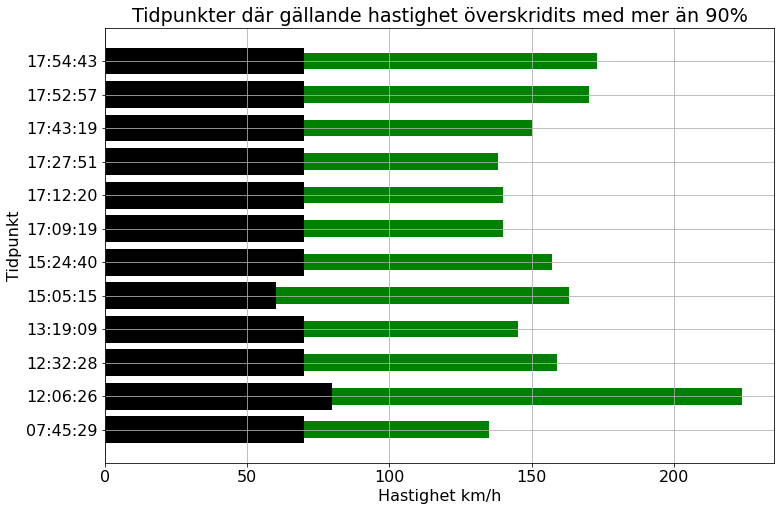

Hastighetsöverträdelserna skedde vid följande 12 platser.

Tid             MätplatsID      Kommun              Vägnummer       Hastighet       
07:45:29        14039010        Skara               49              135 km/h        
12:06:26        14007040        Mariestad           E20             224 km/h        
12:32:28        14090060        Strömstad           1040            159 km/h        
13:19:09        14090050        Strömstad           1040            145 km/h        
15:05:15        14048010        Tjörn               169             163 km/h        
15:24:40        14052030        Göteborg            587             157 km/h        
17:09:19        14093020        Göteborg            E6.21           140 km/h        
17:12:20        14066040        Kungälv             625             140 km/h        
17:27:51        14093040        Göteborg            E6.21           138 km/h        
17:43:19        14052010        Göteborg            587             150 km/h        
17:52:

In [5]:
# ================================================================
# FUNCTION SPEEDING CHECK
def hastighetplus(kamera_data, procentover = -1.0, displayData = True):
    
    # DEFINE VARIABLES
    plushastighet = []
    speedingCount = 0;
    
    # GET SPEEDING INPUT FROM CONSOLE
    while procentover < 0:
        try:
            procentover = float(
                input("Med hur många % skall hastigheten överskrida hastighetsbegränsningen för att visas?"))
        except:
            print("Skriv in en siffra...")
    
    # CHECK FOR SPEEDING ENTRIES
    for i in range(1, len(kamera_data), 1):
        speedLimit = float(kamera_data[i][1])
        speedActual = float(kamera_data[i][2])
        
        # CHECK IF SPEED LIMIT IS EXCEEDED BY GIVEN AMOUNT
        if (speedActual > (speedLimit * ((procentover / 100) + 1))):
            plushastighet.append(kamera_data[i])
            speedingCount += 1
            
    # SORT LIST ON DATE COLUMN
    plushastighet.sort(key = lambda x:x[4])
    
    if displayData:            
        # PRINT SPEEDING DATA TO CONSOLE
        print("\nDet var " 
              + str(speedingCount) 
              + " överträdelser som var mer än " 
              + str(procentover) 
              + "% över gällande hastighet.\n")
        print(f'{"Tid":<16}{"Mätplats ID":<16}{"Gällande Hastighet":<24}{"Hastighet":<16}{"Datum":<16}')
        print("========================================================================================")
        for row in plushastighet:
            print(f'{row[4]:<16}{row[0]:<16}{row[1] + " km/h":<24}{row[2] + " km/h":<16}{row[3]:<16}')
            
        print("========================================================================================\n")
        
    # RETURN CREATED LIST
    return (plushastighet, procentover)

# ================================================================
# FUNCTION SPEEDING CHECK DIAGRAM
def hastighetplusdiagram(plus_hastighet, procent_over):
    
    # DEFINE VARIABLES
    outputList = []    
    listSpeed = []
    listSpeeding = []
    listTime = []   
    
    # MAKE SEPARATE LISTS BY TYPE OF DATA
    for i in range(0, len(plus_hastighet), 1):
        listSpeed.append(float(plus_hastighet[i][1]))
        listSpeeding.append(float(plus_hastighet[i][2]))
        listTime.append(plus_hastighet[i][4])
    
    # PLOT DIAGRAM
    width1 = 0.8
    width2 = 0.5
    plt.figure(figsize=(12,8))
    plt.rcParams.update({'font.size': 16})
    plt.title("Tidpunkter där gällande hastighet överskridits med mer än " + str(procent_over) + "%")
    plt.xlabel("Hastighet km/h")
    plt.ylabel("Tidpunkt")
    plt.barh(listTime, listSpeeding, width2, color='green')
    plt.barh(listTime, listSpeed, width1, color='black')
    plt.grid(True)
    plt.show()
     
# ================================================================
# FUNCTION SPEEDING BY AREA
def hastighetkommun(plus_hastighet, plats_data):
    
    # DEFINE VARIABLES
    tempstring = ""
    listSpeedingArea = []
    speedingCount = len(plus_hastighet)
    
    # LOOP THROUGH LIST AND FIND AREAS WHERE SPEEDING HAS OCCURED
    for i in range(0, len(plus_hastighet), 1):
        tempstring = plus_hastighet[i][0]
        index = ListIndex2D(plats_data, tempstring)
        listSpeedingArea.append(plats_data[index[0]])
        
    # PRINT RESULTING DATA TO CONSOLE
    print("Hastighetsöverträdelserna skedde vid följande " + str(speedingCount) + " platser.\n")
    print(f'{"Tid":<16}{"MätplatsID":<16}{"Kommun":<20}{"Vägnummer":<16}{"Hastighet":<16}')
    print("========================================================================================")
    for j in range(0, len(plus_hastighet), 1):
        print(f'{plus_hastighet[j][4]:<16}{plus_hastighet[j][0]:<16}{listSpeedingArea[j][3]:<20}{listSpeedingArea[j][2]:<16}{plus_hastighet[j][2] + " km/h":<16}')
        
    print("========================================================================================\n")
        
# ================================================================
# FUNCTION FIND INDEX IN 2D LIST
# loopar igenom en tvådinemsionell lista för att hitta listans index för det angivna input-värdet
def ListIndex2D(inputList, item):
    for i, x in enumerate(inputList):
        if item in x:
            return i, x.index(item)

# ================================================================
# HUVUDPROGRAM

# HÄMTA LISTA PÅ FARTÖVERTRÄDELSER OCH SKRIV UT DATA
hastighetplus_data = hastighetplus(kameradata, 90)

# ANVÄND LISTA PÅ FARTÖVERTRÄDELSER FÖR ATT RITA DIAGRAM
hastighetplusdiagram(hastighetplus_data[0], hastighetplus_data[1])

# ANVÄND LISTA PÅ FARTÖVERTRÄDELSER & PLATSDATA FÖR ATT HITTA KOMMUN OCH VÄGNUMMER DÄR DE INTRÄFFAT
hastighetkommun(hastighetplus_data[0], platsdata)

## Deluppgift 5
Ev. kommentar:

## Deluppgift 6
Ev. kommentar: